# How To mesure beauty

## 1. Nombre d'or
> ### - La largeur de la bouche est 1.618 fois la largeur du nez

> ### - La largeur de la bouche est 1.618 fois l'intervalle qui la separe de l'extremité du visage

> ### - Le nez etant un triangle, les cotés font 1.618 fois la base

## 2. Facial Keypoint Detection (Dataset)
> ### - Le dataset contient 15 FKPs (paper)

> ### - Le dataset contient 68 FKPs (an other dataset)

> ### - Chaque FKP a deux coordonnées spatiales (x, y)



# Targered FKPs

## MOUTH    : 49 - 55
## NOSE
> ## PEEK   : 28
> ## BASE   : 32 - 36

## EDGES
> ## LEFT   : 4
> ## RIGHT  : 14

# WORKFLOW

## 1. Data Preprocessing
> ### - Download FKPs dataset
> ### - Load and visualize data
> ### - Data Transformation (Normalization, Rotation, Rescal, RandomCrop)
> ### - Data Iteration and Batching (training & testing)

> ### ```python [[IMAGE ARRAY], [X, Y]]```

> ### 2 Possibilites
> 1. ### Entrainer 68 CNN qui predisent les coordonnees (x, y) d'un FKP 
- ```python [[IMAGE ARRAY], [X, Y]]```
> 2. ### Entrainer 1 CNN qui predit les 136 coordonnees
- ```python [[IMAGE ARRAY], [X..., Y...]]```


## 2. Defining and Training a Naimish CNN to predict FKPs
> ### - Define model with Keras
> ### - Define Training Parameters (Epoch, Loss Function, Optimizer)
> ### - Train model
> ### - Test model

## 3. Defining a Face Beauty classifier
> ### 1 Mean Square
- #### Calcul de la moyenne quadratique

> #### 3.1 La largeur de la bouche est 1.618 fois la largeur du nez
- #### mouthWidth = distance(FKP49, FKP55)
- #### noseWIdth = distance(FKP32, FKP36)
- #### ratioMouthNose = mouthWidth / noseWIdth
- #### accuracy (taux d'exactitude) = ratioMouthNose / 1.618 = 1.

> #### 3.2 La largeur de la bouche est 1.618 fois l'intervalle qui la separe de l'extremité du visage
- #### mouthWidth = distance(FKP49, FKP55),
- #### leftMouthEdgeInterval = distance(FKP4, FKP49)
- #### rightMouthEdgeInterval = distance(FKP55, FKP14)
- ### Left Mouth
- #### ratioLeftMouthEdgeInterval = mouthWidth / leftMouthEdgeInterval
- #### leftAccuracy (taux d'exactitude) = ratioLeftMouthEdgeInterval / 1.618 = 1.
- ### Right Mouth
- #### ratioRightMouthEdgeInterval = mouthWidth / rightMouthEdgeInterval
- #### rightAccuracy (taux d'exactitude) = ratioRightMouthEdgeInterval / 1.618 = 1.

> #### 3.3 Le nez etant un triangle, les cotés font 1.618 fois la base
- #### noseWIdth = distance(FKP32, FKP36)
- #### noseLeft = distance(FKP28, FKP32)
- #### noseLeft = distance(FKP28, FKP36)
- #### Left Nose
- #### ratioLeftBaseNoise = noseLeft / noseWIdth
- #### leftNBaseNoiseAccuracy (taux d'exactitude) = ratioLeftBaseNoise / 1.618 = 1.
- ### Right Nose
- #### ratioRightBaseNoise = noseRight / noseWIdth
- #### rightNBaseNoiseAccuracy (taux d'exactitude) = ratioRightBaseNoise / 1.618 = 1.

> #### FacialBeautyAccuracy = Sum(RuleAccuracies) / rulesNomber 

> ### 2. Train an Unsupervised classifier
- #### KNN (3 classes)
- Note : cela peut etre utilisé comme un algorithme d'etiquetage

> ### 3. Train a Supervised Classifier
- #### KNN (3 classes) as labeling algorithm
- #### Full Connected Neural Network as classifier

## 4. Deploying model as an API


# Facial Keypoint Detection
  
This project will be all about defining and training a convolutional neural network to perform facial keypoint detection, and using computer vision techniques to transform images of faces.  The first step in any challenge like this will be to load and visualize the data you'll be working with. 

Let's take a look at some examples of images and corresponding facial keypoints.

<img src='images/key_pts_example.png' width=100% height=100%/>

Facial keypoints (also called facial landmarks) are the small magenta dots shown on each of the faces in the image above. In each training and test image, there is a single face and **68 keypoints, with coordinates (x, y), for that face**.  These keypoints mark important areas of the face: the eyes, corners of the mouth, the nose, etc. These keypoints are relevant for a variety of tasks, such as face filters, emotion recognition, pose recognition, and so on. Here they are, numbered, and you can see that specific ranges of points match different portions of the face.

<img src='images/landmarks_numbered.jpg' width=60% height=60%/>

---

## Load and Visualize Data

The first step in working with any dataset is to become familiar with your data; you'll need to load in the images of faces and their keypoints and visualize them! This set of image data has been extracted from the [YouTube Faces Dataset](https://www.cs.tau.ac.il/~wolf/ytfaces/), which includes videos of people in YouTube videos. These videos have been fed through some processing steps and turned into sets of image frames containing one face and the associated keypoints.

#### Training and Testing Data

This facial keypoints dataset consists of 5770 color images. All of these images are separated into either a training or a test set of data.

* 3462 of these images are training images, for you to use as you create a model to predict keypoints.
* 2308 are test images, which will be used to test the accuracy of your model.

The information about the images and keypoints in this dataset are summarized in CSV files, which we can read in using `pandas`. Let's read the training CSV and get the annotations in an (N, 2) array where N is the number of keypoints and 2 is the dimension of the keypoint coordinates (x, y).

---

In [1]:
# import the required libraries
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

In [2]:
key_pts_frame = pd.read_csv('data/training_frames_keypoints.csv')

key_pts_frame.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [3]:
n = 0
image_name = key_pts_frame.iloc[n, 0]
key_pts = key_pts_frame.iloc[n, 1:]#.as_matrix()
print(key_pts)
key_pts = key_pts.values
print(type(key_pts))
key_pts = key_pts.astype('float').reshape(-1, 2)

print('Image name: ', image_name)
print('Landmarks shape: ', key_pts.shape)
print('First 4 key pts:\n{}'.format(key_pts[:4]))

0       45
1       98
2       47
3      106
4       49
      ... 
131    119
132     81
133    122
134     77
135    122
Name: 0, Length: 136, dtype: object
<class 'numpy.ndarray'>
Image name:  Luis_Fonsi_21.jpg
Landmarks shape:  (68, 2)
First 4 key pts:
[[ 45.  98.]
 [ 47. 106.]
 [ 49. 110.]
 [ 53. 119.]]


In [4]:
# print out some stats about the data
print('Number of images: ', key_pts_frame.shape[0])

Number of images:  3462


## Look at some images

Below, is a function `show_keypoints` that takes in an image and keypoints and displays them.  As you look at this data, **note that these images are not all of the same size**, and neither are the faces! To eventually train a neural network on these images, we'll need to standardize their shape.

In [5]:
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image)
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')


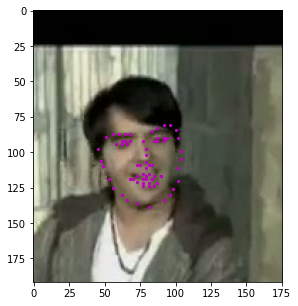

In [6]:
# Display a few different types of images by changing the index n

# select an image by index in our data frame
n = 0
image_name = key_pts_frame.iloc[n, 0]
key_pts = key_pts_frame.iloc[n, 1:].values#.as_matrix()
key_pts = key_pts.astype('float').reshape(-1, 2)

plt.figure(figsize=(5, 5))
show_keypoints(mpimg.imread(os.path.join('data/training/', image_name)), key_pts)
plt.show()

## Dataset class and Transformations

To prepare our data for training, we'll be using PyTorch's Dataset class. Much of this this code is a modified version of what can be found in the [PyTorch data loading tutorial](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

#### Dataset class

``torch.utils.data.Dataset`` is an abstract class representing a
dataset. This class will allow us to load batches of image/keypoint data, and uniformly apply transformations to our data, such as rescaling and normalizing images for training a neural network.


Your custom dataset should inherit ``Dataset`` and override the following
methods:

-  ``__len__`` so that ``len(dataset)`` returns the size of the dataset.
-  ``__getitem__`` to support the indexing such that ``dataset[i]`` can
   be used to get the i-th sample of image/keypoint data.

Let's create a dataset class for our face keypoints dataset. We will
read the CSV file in ``__init__`` but leave the reading of images to
``__getitem__``. This is memory efficient because all the images are not
stored in the memory at once but read as required.

A sample of our dataset will be a dictionary
``{'image': image, 'keypoints': key_pts}``. Our dataset will take an
optional argument ``transform`` so that any required processing can be
applied on the sample. We will see the usefulness of ``transform`` in the
next section.


In [7]:
from torch.utils.data import Dataset, DataLoader

class FacialKeypointsDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.key_pts_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.key_pts_frame)

    def __getitem__(self, idx):
        image_name = os.path.join(self.root_dir,
                                self.key_pts_frame.iloc[idx, 0])
        
        # image matrix
        image = mpimg.imread(image_name)
        
        # if image has an alpha color channel, get rid of it
        if(image.shape[2] == 4):
            image = image[:,:,0:3]
        
        key_pts = self.key_pts_frame.iloc[idx, 1:].values#.as_matrix()

        key_pts = key_pts.astype('float').reshape(-1, 2)
        sample = {'image': image, 'keypoints': key_pts}

        if self.transform:
            sample = self.transform(sample)

        return sample

Now that we've defined this class, let's instantiate the dataset and display some images.

In [8]:
# Construct the dataset
face_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                      root_dir='data/training/')

# print some stats about the dataset
print('Length of dataset: ', len(face_dataset))

Length of dataset:  3462


0 (132, 122, 3) (68, 2)
1 (360, 371, 3) (68, 2)
2 (262, 237, 3) (68, 2)


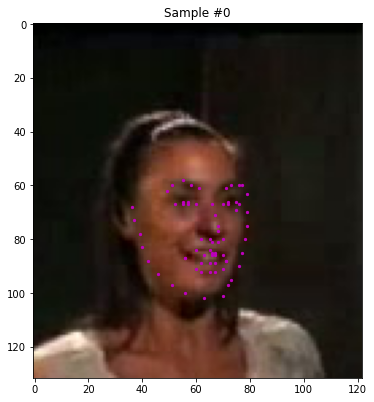

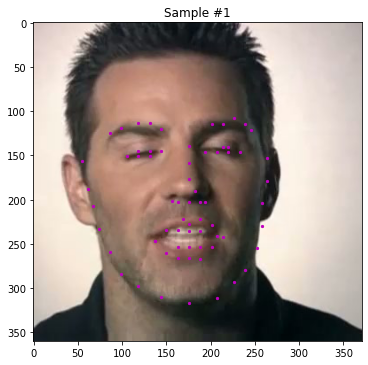

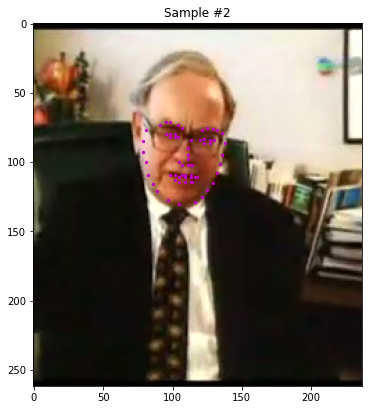

In [9]:
# Display a few of the images from the dataset
num_to_display = 3

for i in range(num_to_display):
    
    # define the size of images
    fig = plt.figure(figsize=(20,10))
    
    # randomly select a sample
    rand_i = np.random.randint(0, len(face_dataset))
    sample = face_dataset[rand_i]

    # print the shape of the image and keypoints
    print(i, sample['image'].shape, sample['keypoints'].shape)

    ax = plt.subplot(1, num_to_display, i + 1)
    ax.set_title('Sample #{}'.format(i))
    
    # Using the same display function, defined earlier
    show_keypoints(sample['image'], sample['keypoints'])


## Transforms

Now, the images above are not of the same size, and neural networks often expect images that are standardized; a fixed size, with a normalized range for color ranges and coordinates, and (for PyTorch) converted from numpy lists and arrays to Tensors.

Therefore, we will need to write some pre-processing code.
Let's create four transforms:

-  ``Normalize``: to convert a color image to grayscale values with a range of [0,1] and normalize the keypoints to be in a range of about [-1, 1]
-  ``Rescale``: to rescale an image to a desired size.
-  ``RandomCrop``: to crop an image randomly.
-  ``ToTensor``: to convert numpy images to torch images.


We will write them as callable classes instead of simple functions so
that parameters of the transform need not be passed everytime it's
called. For this, we just need to implement ``__call__`` method and 
(if we require parameters to be passed in), the ``__init__`` method. 
We can then use a transform like this:

    tx = Transform(params)
    transformed_sample = tx(sample)

Observe below how these transforms are generally applied to both the image and its keypoints.



In [ ]:
import torch
from torchvision import transforms, utils

In [ ]:
# tranforms

class Normalize(object):
    """Convert a color image to grayscale and normalize the color range to [0,1]."""        

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']
        
        image_copy = np.copy(image)
        key_pts_copy = np.copy(key_pts)

        # convert image to grayscale
        image_copy = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        # scale color range from [0, 255] to [0, 1]
        image_copy=  image_copy/255.0
        
        # scale keypoints to be centered around 0 with a range of [-1, 1]
        # mean = 100, sqrt = 50, so, pts should be (pts - 100)/50
        key_pts_copy = (key_pts_copy - 100)/50.0


        return {'image': image_copy, 'keypoints': key_pts_copy}


class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        # output_size est de type int ou tuple
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size # (h, w)

        new_h, new_w = int(new_h), int(new_w)

        img = cv2.resize(image, (new_w, new_h))
        
        # scale the pts, too
        key_pts = key_pts * [new_w / w, new_h / h]

        return {'image': img, 'keypoints': key_pts}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        key_pts = key_pts - [left, top]

        return {'image': image, 'keypoints': key_pts}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']
         
        # if image has no grayscale color channel, add one
        if(len(image.shape) == 2):
            # add that third color dim
            image = image.reshape(image.shape[0], image.shape[1], 1)
            
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        
        return {'image': torch.from_numpy(image),
                'keypoints': torch.from_numpy(key_pts)}

class AddBatchChannel(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']
         
        # if image has no grayscale color channel, add one
        if(len(image.shape) == 2):
            # add that third color dim
            image = image.reshape(image.shape[0], image.shape[1], 1)
            
        # swap color axis because
        # numpy image: H x W x C
        # batch image: C X H X W
        # image = image.transpose((2, 0, 1))
        
        return {'image': image,
                'keypoints': key_pts}

## Transform Compose

In [ ]:
class TransformCompose(object):
    def __init__(self, transforms=[]):
        # s'assurer qu'on a la liste de transformation
        assert isinstance(transforms, list)

        self.transforms = transforms
    
    def __call__(self, sample):
        """
            Applique la combinaison de transformations

            :return: tuple (np.array, (x, y))
        """
        # nouvelle transformation
        newSample = sample

        # appliquer les transformations
        for transform in self.transforms:
            newSample = transform(newSample)

        # add chanel
        image = newSample['image']
         
        # if image has no grayscale color channel, add one
        if(len(image.shape) == 2):
            # add that third color dim
            image = image.reshape(image.shape[0], image.shape[1], 1)
        
        # swap color axis because
        # numpy image: H x W x C
        # image: C X H X W
        image = image.transpose((2, 0, 1))

        newSample['image'] = image
        
        return newSample['image'], newSample['keypoints']

## Test out the transforms

Let's test these transforms out to make sure they behave as expected. As you look at each transform, note that, in this case, **order does matter**. For example, you cannot crop a image using a value smaller than the original image (and the orginal images vary in size!), but, if you first rescale the original image, you can then crop it to any size smaller than the rescaled size.

In [ ]:
# test out some of these transforms
rescale = Rescale(100)
crop = RandomCrop(50)
composed = transforms.Compose([Rescale(250),
                               RandomCrop(224)])

# apply the transforms to a sample image
test_num = 500
sample = face_dataset[test_num]

fig = plt.figure()
for i, tx in enumerate([rescale, crop, composed]):
    transformed_sample = tx(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tx).__name__)
    show_keypoints(transformed_sample['image'], transformed_sample['keypoints'])

plt.show()

## Create the transformed dataset

Apply the transforms in order to get grayscale images of the same shape. Verify that your transform works by printing out the shape of the resulting data (printing out a few examples should show you a consistent tensor size).

In [ ]:
# define the data tranform
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250),
                                     RandomCrop(224),
                                     Normalize(),
                                     ToTensor()])

# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                             root_dir='data/training/',
                                             transform=data_transform)


In [ ]:
# print some stats about the transformed data
print('Number of images: ', len(transformed_dataset))

# make sure the sample tensors are the expected size
for i in range(5):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())


## Data Iteration and Batching

Right now, we are iterating over this data using a ``for`` loop, but we are missing out on a lot of PyTorch's dataset capabilities, specifically the abilities to:

-  Batch the data
-  Shuffle the data
-  Load the data in parallel using ``multiprocessing`` workers.

``torch.utils.data.DataLoader`` is an iterator which provides all these
features, and we'll see this in use in the *next* notebook, Notebook 2, when we load data in batches to train a neural network!

---



In [1]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 96  # Our training data consists of images with width of 150 pixels and height of 150 pixels

## Dataset with no any transformation

In [10]:

# create the transformed training dataset

# data_transform = transforms.Compose([Rescale(150),
#                                      RandomCrop(IMG_SHAPE),
#                                      Normalize(),
#                                      AddBatchChannel()])

data_transform = None

trainingDataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                             root_dir='data/training/',
                                             transform=data_transform)

# create the transformed testing dataset
# data_transform = transforms.Compose([Rescale((IMG_SHAPE, IMG_SHAPE)),
#                                      Normalize(),
#                                      AddBatchChannel()])

data_transform = None


testingDataset = FacialKeypointsDataset(csv_file='data/test_frames_keypoints.csv',
                                             root_dir='data/test/',
                                             transform=data_transform)                                         

## Dataset with transformation

In [ ]:

# create the transformed training dataset
data_transform = transforms.Compose([Rescale(150),
                                     RandomCrop(IMG_SHAPE),
                                     Normalize(),
                                     AddBatchChannel()])



trainingDataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                             root_dir='data/training/',
                                             transform=data_transform)


# create the transformed testing dataset
data_transform = transforms.Compose([Rescale((IMG_SHAPE, IMG_SHAPE)),
                                     Normalize(),
                                     AddBatchChannel()])



testingDataset = FacialKeypointsDataset(csv_file='data/test_frames_keypoints.csv',
                                             root_dir='data/test/',
                                             transform=data_transform)                                         

In [11]:
sample = trainingDataset[0]

print(f"image shape : {sample['image'].shape} and FKPs shape : {sample['keypoints'].shape}")

image shape : (192, 176, 3) and FKPs shape : (68, 2)


In [14]:
sample = testingDataset[0]

print(f"image shape : {sample['image'].shape} and FKPs shape : {sample['keypoints'].shape}")

image shape : (103, 89, 3) and FKPs shape : (68, 2)


In [ ]:
trainingDataset = [data for data in trainingDataset]
testingDataset  = [data for data in testingDataset]

In [15]:
len(trainingDataset)

3462

# Train data and Validation data
> ### - Train data : 80% train dataset
> ### - Validation data : 20% train dataset

## Transform dataset to numpy inputs and targets

In [22]:
def transformDataset(dataset):
    inputs  = []
    targets = []

    for sample in dataset:
        image       = sample['image']
        keypoints   = sample['keypoints']

        image       = np.array(image)
        keypoints   = np.array(keypoints)

        inputs.append(image)
        targets.append(keypoints)
    
    inputs  = np.array(inputs)
    targets = np.array(targets)

    return inputs, targets

## Transformation example

In [37]:
import numpy as np

nb = 5
array = []
fakeData = np.random.rand(nb,  96, 96, 1)

for x in fakeData:
    print(x.shape)
    array.append(x)

array = np.array(array)
array.shape


(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)


(5, 96, 96, 1)

In [29]:
# separation de donnees
from sklearn.model_selection import train_test_split
import numpy as np

In [30]:
VALIDATION_SPLIT    = 0.20

## Fake data for testing

In [3]:
nb = 3000
inputs = np.random.rand(nb,  96, 96, 1)
targets = np.random.rand(nb,68,2)

print(f"inputs.shape : {inputs.shape}\ttargets.shape : {targets.shape}")

## Dataset Transformation

In [24]:
inputs, targets = transformDataset(trainingDataset)

print(f"inputs.shape : {inputs.shape}\ttargets.shape : {targets.shape}")


In [41]:
inputs[0].shape

(192, 176, 3)

In [42]:
inputs[1].shape

(196, 157, 3)

## Split dataset into training and validation

In [43]:
trainDatas, validationDatas, trainLabels, validationLabels = train_test_split(
    inputs,targets, 
    test_size = VALIDATION_SPLIT,
    shuffle = True
)

# Training datas
trainDatas = np.array(trainDatas)
trainLabels = np.array(trainLabels)

# Validation datas
validationDatas = np.array(validationDatas)
validationLabels = np.array(validationLabels)


In [44]:
trainDatas.shape

(2769,)

In [45]:
validationDatas.shape

(693,)

## Testing data transformation

In [48]:
# Testing datas
testDatas, testLabels = transformDataset(testingDataset)

testDatas = np.array(testDatas)
testLabels = np.array(testLabels)

print(f"inputs.shape : {testDatas.shape}\ttargets.shape : {testLabels.shape}")

inputs.shape : (770,)	targets.shape : (770, 68, 2)


In [47]:
testDatas.shape

(770,)

## Custom generator for memory optimization

In [7]:
class DataGenerator(object):

    # class variables
    TRAINING = "training"
    TESTING = "testing"
    VALIDATION = "validation"


    def __init__(self, targetLabel=0, targetData='training', batchSize=20):
        # targetLabel index must be int
        assert isinstance(targetLabel, int)

        # targetLata must be str 
        assert isinstance(targetData, str) and targetData in [self.TRAINING, self.TESTING, self.VALIDATION]

        # batchSize index must be int
        assert isinstance(batchSize, int)

        self.targetLabel = targetLabel
        self.targetData = targetData
        self.batchSize = batchSize

        # counter 
        self.lastbatch = 0


        # compute size
        self.size = self.shape()[0]       

    def __len__(self):
        return self.size

    def __iter__(self):
        return self
    
    def __next__(self):
        return self.next()
    
    def __repr__(self):
        return (
            f"DataGenerator\n\n"
            f"targetData  : {self.targetData}\n"
            f"targetLabel : {self.targetLabel}\n"
            f"size        : {self.size}\n"
            f"batchSize   : {self.batchSize}\n"

        )
    
    def shape(self):
        if self.targetData == self.TRAINING:
            return trainDatas.shape

        elif self.targetData == self.TESTING:
            return testDatas.shape

        elif self.targetData == self.VALIDATION:
            return validationDatas.shape
        
    def makeBatch(self, datas, targets, selectedIndex):
        """
            Make a batch
        """

        batch = []

        for index in range(self.lastbatch, selectedIndex):
            # index out of range
            if index >= self.size:
                break

            # sample, image and target FPK
            sample = (datas[index], targets[index][self.targetLabel])

            batch.append(sample)
        
        return batch

    
    def next(self):
        # index out of size
        if self.lastbatch >= self.size:
            self.lastbatch = 0
            raise StopIteration()

        # batch size
        batch = list()

        # last index
        lastindex = self.lastbatch + self.batchSize

        if self.targetData == self.TRAINING:
            batch = self.makeBatch(trainDatas, trainLabels, lastindex)

        elif self.targetData == self.TESTING:
            batch = self.makeBatch(testDatas, testLabels, lastindex)

        elif self.targetData == self.VALIDATION:
            batch = self.makeBatch(validationDatas, validationLabels, lastindex)

        # next batch
        self.lastbatch = lastindex

        if len(batch) == 0:
            self.lastbatch = 0
            raise StopIteration()

        return batch
        


In [8]:
trainingGenTest = DataGenerator(targetData='training', targetLabel=0, batchSize=20)
trainingGenTest


DataGenerator

targetData  : training
targetLabel : 0
size        : 2400
batchSize   : 20

In [9]:
for data in trainingGenTest:
    print(f"Data Size  : {len(data)}\t- Data Type : {type(data)}\n")

    sample = data[0]

    print(f"Image size : {sample[0].shape}\t- Target Size : {sample[1].shape}\n")

    break

Data Size  : 20	- Data Type : <class 'list'>

Image size : (96, 96, 1)	- Target Size : (2,)



In [11]:
testingGenTest = DataGenerator(targetData='testing', targetLabel=0, batchSize=20)
testingGenTest


DataGenerator

targetData  : testing
targetLabel : 0
size        : 0
batchSize   : 20

In [ ]:
validationGenTest = DataGenerator(targetData='validation', targetLabel=0, batchSize=20)
validationGenTest


# Defining and Training a Convolutional Neural Network (CNN) to Predict Facial Keypoints

In [10]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [11]:
naimishModel = tf.keras.models.Sequential([
    # First layer
    tf.keras.layers.Conv2D(32, (4,4), input_shape=(96, 96, 1), activation='elu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),

    # second layer
    tf.keras.layers.Conv2D(64, (3,3), activation='elu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    # Third layer
    tf.keras.layers.Conv2D(128, (2,2), activation='elu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    # Fourth layer
    tf.keras.layers.Conv2D(256, (1,1), activation='elu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),

    # Flatten
    tf.keras.layers.Flatten(),

    # Dense 1
    tf.keras.layers.Dense(1000, activation='elu'),
    tf.keras.layers.Dropout(0.5),

    # Dense 2
    tf.keras.layers.Dense(1000, activation='elu'),
    tf.keras.layers.Dropout(0.6),

    # Dense 1
    tf.keras.layers.Dense(2, activation='elu'),

])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Learning Configuration

In [12]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False,
    name="Adam"
)

naimishModel.compile(
    optimizer=optimizer,
    loss=tf.keras.metrics.mean_squared_error,
    metrics=['accuracy']
)


## Model Summary

In [13]:
naimishModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 93, 93, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       3

## Test clone keras model

In [14]:
modelClone = tf.keras.models.clone_model(naimishModel)

print(f"\nmodelClone == naimishModel : {modelClone == naimishModel}\n")
print(f"modelClone is naimishModel : {modelClone is naimishModel}\n")
print(f"\nid(modelClone)   : {id(modelClone)}\n\nid(naimishModel) : {id(naimishModel)}")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

modelClone == naimishModel : False

modelClone is naimishModel : False


id(modelClone)   : 1897172087624

id(naimishModel) : 1897172286728


In [15]:
modelClone.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 93, 93, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       3

# Training

> ### - Train data : 80% train dataset
> ### - Validation data : 20% train dataset
> ### - Batch SIze : 128
> ### - Epochs : 300
> ### - Early Stopping Callback (ESC) :  stops the training when the number of contiguous epochs without improvement in validation loss are 30 (Patience Level . 
> ### -  Model Checkpoint Callback (MCC) : stores the weights of the model with the lowest validation loss.

## Callback functions

In [16]:
BATCH_SIZE          = 128
EPOCHS              = 2
PATIENCE            = 30

In [ ]:
trainDataGen = DataGenerator(targetData='validation', targetLabel=0, batchSize=BATCH_SIZE)
trainDataGen

In [ ]:
validationDataGen = DataGenerator(targetData='validation', targetLabel=0, batchSize=BATCH_SIZE)
validationDataGen

In [17]:
import os

cwd = os.getcwd()

logDir = os.path.join(cwd, 'logs')

if not os.path.isdir(logDir):
    os.makedirs(logDir)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=PATIENCE),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir=logDir),
]

In [19]:
history = modelClone.fit(
    trainDatas,
    trainLabels[:, 0, :],
    epochs=EPOCHS,
    validation_data = (validationDatas, validationLabels[:, 0, :]),
    callbacks=my_callbacks,
    verbose=1

)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

## Toujours compiler un model apres clonage
## You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [20]:
modelClone.compile(
    optimizer=optimizer,
    loss=tf.keras.metrics.mean_squared_error,
    metrics=['accuracy']
)

In [ ]:
history = modelClone.fit(
    trainDatas,
    trainLabels[:, 0, :],
    epochs=1,
    validation_data = (validationDatas, validationLabels[:, 0, :]),
    callbacks=my_callbacks,
    verbose=1

)

# Global and parallel training

In [21]:
import os

In [22]:
def makeFolder(targetPath):
    if not os.path.isdir(targetPath):
        os.makedirs(targetPath)

## Save history object Helper

In [29]:
import pickle

class HistoryManager(object):
    def __init__(self, targetFile, data):
        assert isinstance(targetFile, str)

        self.filename = f"{targetFile}.data"

        self.data = data
    
    def save(self, targetObject=None):
        if targetObject == None:
            targetObject = self.data = data

        with open(self.filename, 'wb') as handle:
            pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    def load(self):
        with open(self.filename, 'rb') as handle:
            data = pickle.load(handle)
        
        return data


In [30]:
a = {"a": "b"}

am = HistoryManager("savedObject", a)


In [31]:
am.save()

In [32]:
b = am.load()
b

{'a': 'b'}

## Train model Helper

In [47]:
from threading import RLock


def trainModel(model, fkp, my_callbacks, epochs, fkpFolder):

    lock = RLock()

    with lock:
        # fit model
        history = model.fit(
            trainDatas,
            trainLabels[:, fkp, :],
            epochs=epochs,
            validation_data = (validationDatas, validationLabels[:, fkp, :]),
            callbacks=my_callbacks,
            verbose=1
        )

    # save history
    historyFile = os.path.join(fkpFolder, 'history')

    HistoryManager(historyFile, a)




## Make training Thread

In [48]:
import os
from threading import Thread


# current work directory
cwd = os.getcwd()

# models folder
modelsFolder = os.path.join(cwd, 'models')

makeFolder(modelsFolder)

# Thread list
trainingThreads = []

# iter FKPS
for fkp in range(1):
    # clone model
    modelClone = tf.keras.models.clone_model(naimishModel)

    # compile clone model
    modelClone.compile(
        optimizer=optimizer,
        loss=tf.keras.metrics.mean_squared_error,
        metrics=['accuracy']
    )

    # define callbacks
    fkpFolder = os.path.join(modelsFolder, str(f"FKP{fkp}"))
    makeFolder(fkpFolder)


    logDir = os.path.join(fkpFolder, 'logs')
    makeFolder(logDir)

    if not os.path.isdir(logDir):
        os.makedirs(logDir)
    
    modelFile = f"{fkpFolder}/" + 'model.{epoch:02d}-{val_loss:.2f}.h5'

    my_callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=PATIENCE),
        tf.keras.callbacks.ModelCheckpoint(filepath=modelFile),
        tf.keras.callbacks.TensorBoard(log_dir=logDir),
    ]

    # create training thread

    trainThread = Thread(
        target=trainModel,
        args=(modelClone, fkp, my_callbacks, 1, fkpFolder),
        name=f"TrainingTread#{fkp}"
    )
    
    # add thread to training tread list
    trainingThreads.append(trainThread)



In [49]:
len(trainingThreads)

1

In [50]:
trainingThreads[0]

<Thread(TrainingTread#0, initial)>

## Start training Threads

In [51]:
for trainingTread in trainingThreads:
    trainingTread.start()

# End of thread
for trainingTread in trainingThreads:
    trainingTread.join()

Train on 2400 samples, validate on 600 samples
Exception in thread TrainingTread#0:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-47-086e646e359d>", line 16, in trainModel
    verbose=1
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py", line 780, in fit
    steps_name='steps_per_epoch')
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training_arrays.py", line 157, in model_iteration
    f = _make_execution_function(model, mode)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training_arrays.py", line 532, in _make_execution_function
    return model._make_execution_function(mo

## Result Visualization

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Export model

In [ ]:
import time
import os

savedModelPath = os.path.join(os.getcwd(), f"saved_models/")

if not os.path.exists(savedModelPath):
  os.makedirs(savedModelPath)

model.trainable = False
model.save(savedModelPath)

## Load saved model

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
loadedModel = tf.keras.models.load_model(saved_model_path)

# Show the model architecture
loadedModel.summary()